## exercises 01

## Exploratory Weather Data Analysis 

Exploratory analysis of weather data

In [1]:
### Import dependencies 
import pandas as pd # Adding dataframe functionality
from matplotlib import pyplot as plt # Add plotting functionality
from statistics import mean

In [2]:
### Read in the weather data from a .csv-file 
weather_data = pd.read_csv("../Data/Raw/weather/weather.csv", sep=",")


In [3]:
### Print the dimensions of the data as well as all the fields 
print(f"Length of the data: {len(weather_data)}")
print(f"Fields: {len(weather_data.columns)}")
for i in weather_data.columns:
    print(i)

Length of the data: 20220
Fields: 9
date
iso3166-2
RelativeHumiditySurface
SolarRadiation
Surfacepressure
TemperatureAboveGround
Totalprecipitation
UVIndex
WindSpeed


In [4]:
### Check for missing values in the data set 
weather_data.isnull().values.any()

False

In [5]:
### Add two new columns based on the iso3166-2 column to 
### create a "country"-column and a "region"-column
weather_data[["country","region"]]= weather_data["iso3166-2"].str.split("-",expand=True)


In [6]:
### Filter the data based on the country
nl_data = weather_data[weather_data["country"] == "NL"]

In [7]:
### Group data based on region and for each region calculate 
### min, max, mean and median for each numeric column. 
### For each of the regions, write these to a file named after the region
agg_data = nl_data.groupby("region")
for i in agg_data:
    # print(i[0])
    # print(i[1])
    with open(f"{i[0]}_summary.txt","w") as outfile:
        outfile.write(str(i[1].describe()))

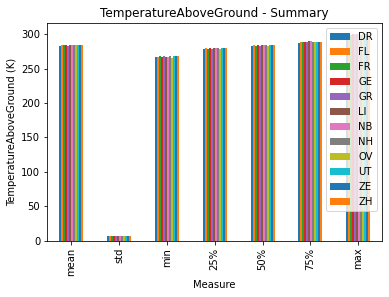

In [8]:
### Plot TemperatureAboveGround 
tmp_df = pd.DataFrame()
for i in agg_data:
    
    tmp = i[1].describe()
    tmp_df[i[0]] = tmp["TemperatureAboveGround"][1:]
tmp_df.plot(kind="bar")
plt.title("TemperatureAboveGround - Summary")
plt.ylabel("TemperatureAboveGround (K)")
plt.xlabel("Measure")
plt.show()

In [9]:
### Group data based on date and calculate means of all 
### numerical columns 
agg_data = nl_data.groupby("date")
mean_data = {}
index = []
for i in agg_data:
    index.append(i[0])
    tmp = i[1].describe()
    for j in tmp:
        if j in mean_data.keys():
            mean_data[j].append(tmp[j]["mean"])
        else:
            mean_data[j] = [tmp[j]["mean"]]
new_data = pd.DataFrame(mean_data,index=index)
new_data.index = pd.to_datetime(new_data.index)

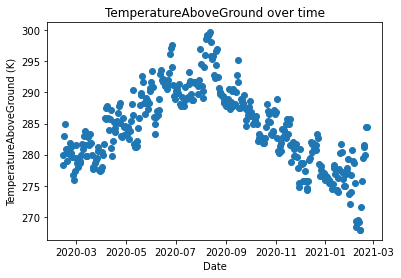

In [10]:
### Plot TemperatureAboveGround v. time 
plt.plot_date(new_data.index, new_data["TemperatureAboveGround"],xdate=True)
plt.title("TemperatureAboveGround over time")
plt.ylabel("TemperatureAboveGround (K)")
plt.xlabel("Date")
plt.show()
# print(new_data)